In [3]:
!pip install opencv-python==3.4.2.16

!pip install opencv-contrib-python==3.4.2.16

In [4]:
import cv2
import numpy as np

In [6]:
import cv2
import numpy as np

img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
cv2.imshow('Input', img)

dst = cv2.cornerHarris(gray, blocksize=2, ksize=5, k=0.04)

dst = cv2.dilate(dst,None)

img[dst > 0.01*dst.max()] = [0,0,0]
cv2.imshow('Harris Corners(only sharp)',img)
cv2.waitKey()
cv2.destroyAllWindows()

TypeError: Required argument 'blockSize' (pos 2) not found

In [14]:
import cv2

input_image = cv2.imread('Mix/3.jpg')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray_image, None)

input_image = cv2.drawKeypoints(image=input_image, outImage=input_image, keypoints=keypoints,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,color = (51, 163, 236))

cv2.imshow('SIFT features', input_image)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
import cv2

img = cv2.imread('Mix/3.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(float(8000))
kp, des = surf.detectAndCompute(gray, None)

img = cv2.drawKeypoints(img, kp, None, (0,255,0), 4)
cv2.imshow('SURF features', img)
cv2.waitKey()
# This closes all open windows 
# Failure to place this will cause your program to hang
cv2.destroyAllWindows()

In [13]:
import cv2
import numpy as np

input_image = cv2.imread('Mix/3.jpg')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()

keypoints = fast.detect(gray_image, None)
print ("Number of keypoints with non max suppression:", len(keypoints))

img_keypoints_with_nonmax = input_image.copy()
result=cv2.drawKeypoints(image=gray_image, outImage=gray_image,keypoints=keypoints, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('FAST keypoints - with non max suppression', result)

keypoints = fast.detect(gray_image, None)

print ("Total Keypoints without nonmaxSuppression:", len(keypoints))

img_keypoints_without_nonmax = input_image.copy()
result1=cv2.drawKeypoints(image=gray_image, outImage=gray_image, keypoints=keypoints, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('FAST keypoints - without non max suppression', result1)
cv2.waitKey()
cv2.destroyAllWindows()

Number of keypoints with non max suppression: 1762
Total Keypoints without nonmaxSuppression: 1762


In [8]:
import cv2

gray_image = cv2.imread('1.jpg', 0)

fast = cv2.FastFeatureDetector_create()

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

keypoints = fast.detect(gray_image, None)

keypoints, descriptors = brief.compute(gray_image, keypoints)
gray_keypoints = cv2.drawKeypoints(image=gray_image,outImage=gray_image, keypoints=keypoints,color=(0,255,0))

cv2.imshow('BRIEF keypoints', gray_keypoints)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('input1.PNG',0)          # queryImage
img2 = cv2.imread('input2.PNG',0) # trainImage

# Initiate SIFT detector
# orb = cv2.ORB() use in older version

orb = cv2.ORB_create()   
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

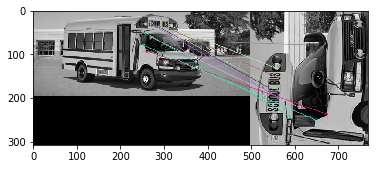

(<matplotlib.image.AxesImage at 0x7faa08410be0>, None)

In [18]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()

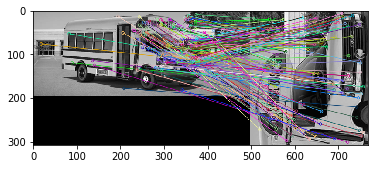

(<matplotlib.image.AxesImage at 0x7faa08e45400>, None)

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('input1.PNG',0)          # queryImage
img2 = cv2.imread('input2.PNG',0) # trainImage

# Initiate SIFT detector
# sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

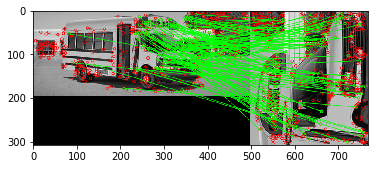

(<matplotlib.image.AxesImage at 0x7faa090a14e0>, None)

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('input1.PNG',0)          # queryImage
img2 = cv2.imread('input2.PNG',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
# FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

In [66]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [68]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
        
cv2.waitKey()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [9]:
import cv2
import numpy as np

def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    # Create a new output image that concatenates the two images together
    output_img = np.zeros((max([rows1,rows2]), cols1+cols2, 3), dtype='uint8')
    output_img[:rows1, :cols1, :] = np.dstack([img1, img1, img1])
    output_img[:rows2, cols1:cols1+cols2, :] = np.dstack([img2, img2, img2])

    # Draw connecting lines between matching keypoints
    for match in matches:
        # Get the matching keypoints for each of the images
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx

        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw a small circle at both co-ordinates and then draw a line
        radius = 4
        colour = (0,255,0)   # green 
        thickness = 1
        cv2.circle(output_img, (int(x1),int(y1)), radius, colour, thickness)   
        cv2.circle(output_img, (int(x2)+cols1,int(y2)), radius, colour, thickness)
        cv2.line(output_img, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), colour, thickness)

    return output_img

if __name__=='__main__':
    img1 = cv2.imread('input2.PNG', 0)       # queryImage
    img2 = cv2.imread('input1.PNG', 0)          # trainImage

    #img1 = cv2.imread(sys.argv[1], 0)   # query image (rotated subregion)
    #img2 = cv2.imread(sys.argv[2], 0)   # train image (full image)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Extract keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Create Brute Force matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in the order of their distance
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 'n' matches
    img3 = draw_matches(img1, keypoints1, img2, keypoints2, matches[:30])

    cv2.imshow('Matched keypoints', img3)
    cv2.waitKey()
    cv2.destroyAllWindows()

TypeError: Image data cannot be converted to float

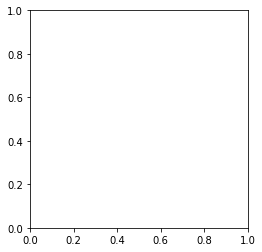

In [4]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('input2.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('input1.png',cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
# matches = bf.knnMatch(des1,des2, k=2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2, matches[:40],img2,flags=2)

plt.imshow(img3),plt.show()

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

queryImage = cv2.imread('input2.png',0)
trainingImage = cv2.imread('input1.png',0)

# create SIFT and detect/compute
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(queryImage,None)
kp2, des2 = sift.detectAndCompute(trainingImage,None)

# FLANN matcher parameters
# FLANN_INDEX_KDTREE = 0
indexParams = dict(algorithm = 0, trees = 5)
searchParams = dict(checks=20)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(indexParams,searchParams)

matches = flann.knnMatch(des1,des2,k=2)

# prepare an empty mask to draw good matches
matchesMask = [[0,0] for i in range(len(matches))]

# David G. Lowe's ratio test, populate the mask
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

drawParams = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

resultImage = cv2.drawMatchesKnn(queryImage,kp1,trainingImage,kp2,matches,None,**drawParams)

plt.imshow(resultImage,),plt.show()

error: OpenCV(3.4.2) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1121: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'


In [35]:
from os.path import join
from os import walk
import numpy as np
import cv2
from sys import argv
folder = "Tatto/images/"
query = cv2.imread(("Tatto/target/tattoo_seed.jpg"), 0)

files = []
images = []
descriptors = []
for (dirpath, dirnames, filenames) in walk(folder):
    files.extend(filenames)
    for f in files:
        if f.endswith("jpg") and f != "tattoo_seed.jpg":
            descriptors.append(f)
    print(descriptors)

sift = cv2.xfeatures2d.SIFT_create()

query_kp, query_ds = sift.detectAndCompute(query,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

MIN_MATCH_COUNT = 10

potential_culprits = {}

print(">> Initiating picture scan...")
for d in descriptors:
    print("--------- analyzing %s for matches ------------" % d)
    matches = flann.knnMatch(query_ds, np.load(join(folder, d)), k=2)
    good = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good.append(m)
    if len(good) > MIN_MATCH_COUNT:

        print("%s is a match! (%d)" % (d, len(good)))
    else:
        print("%s is not a match" % d)
    potential_culprits[d] = len(good)

max_matches = None
potential_suspect = None
for culprit, matches in potential_culprits.items():
    if max_matches == None or matches > max_matches:
        max_matches = matches
        potential_suspect = culprit

# print ("potential suspect is %s" % potential_suspect.replace("npy", "").upper())

['posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg']
>> Initiating picture scan...
--------- analyzing posion-ivy.jpg for matches ------------


OSError: Failed to interpret file 'Tatto/images/posion-ivy.jpg' as a pickle

In [33]:
descriptors = []
for (dirpath, dirnames, filenames) in walk(folder):
    print(dirpath,filenames)
    files.extend(filenames)
    for f in files:
        print(f)
        if f.endswith("jpg") and f != "tattoo_seed.jpg":
            descriptors.append(f)


Tatto/images/ ['posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg']
posion-ivy.jpg
riddler.jpg
bane.jpg
dr-hurt.jpg
hush.jpg
two-face.jpg
posion-ivy.jpg
riddler.jpg
bane.jpg
dr-hurt.jpg
hush.jpg
two-face.jpg
posion-ivy.jpg
riddler.jpg
bane.jpg
dr-hurt.jpg
hush.jpg
two-face.jpg
posion-ivy.jpg
riddler.jpg
bane.jpg
dr-hurt.jpg
hush.jpg
two-face.jpg
posion-ivy.jpg
riddler.jpg
bane.jpg
dr-hurt.jpg
hush.jpg
two-face.jpg
posion-ivy.jpg
riddler.jpg
bane.jpg
dr-hurt.jpg
hush.jpg
two-face.jpg


In [34]:
print(descriptors)

['posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg', 'posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg', 'posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg', 'posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg', 'posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg', 'posion-ivy.jpg', 'riddler.jpg', 'bane.jpg', 'dr-hurt.jpg', 'hush.jpg', 'two-face.jpg']


In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

     # Take each frame
     _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
    cv2.destroyAllWindows()

In [3]:
import cv2

#-----Reading the image-----------------------------------------------------
img = cv2.imread('car.jpg', 1)
cv2.imshow("img",img) 

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab",lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.imshow('a_channel', a)
cv2.imshow('b_channel', b)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np


# Load our damaged photo
image = cv2.imread('car.jpg')
cv2.imshow('Original Damaged Photo', image)
cv2.waitKey(0)

# Load the photo where we've marked the damaged areas
marked_damages = cv2.imread('images/mask.jpg', 0)
cv2.imshow('Marked Damages', marked_damages)
cv2.waitKey(0)

# Let's make a mask out of our marked image be changing all colors 
# that are not white, to black
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.waitKey(0)

# Let's dilate (make thicker) our the marks w made
# since thresholding has narrowed it slightly
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
cv2.imshow('Dilated Mask', mask)
cv2.imwrite("images/abraham_mask.png", mask)

cv2.waitKey(0)
restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

cv2.imshow('Restored', restored)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(3.4.2) /io/opencv/modules/highgui/src/window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [ ]:
from os.path import join
from os import walk
import numpy as np
import cv2
from sys import argv
folder = "../matching/images/"
query = cv2.imread(("../matching/images/tattoo_seed.jpg"), 0)

files = []
images = []
descriptors = []
for (dirpath, dirnames, filenames) in walk(folder):
    files.extend(filenames)
    for f in files:
        if f.endswith("npy") and f != "tattoo_seed.npy":
            descriptors.append(f)
    print(descriptors)

sift = cv2.xfeatures2d.SIFT_create()
query_kp, query_ds = sift.detectAndCompute(query, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

MIN_MATCH_COUNT = 10

potential_culprits = {}

print(">> Initiating picture scan...")
for d in descriptors:
    print("--------- analyzing %s for matches ------------" % d)
    matches = flann.knnMatch(query_ds, np.load(join(folder, d)), k=2)
    good = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good.append(m)
    if len(good) > MIN_MATCH_COUNT:

        print("%s is a match! (%d)" % (d, len(good)))
    else:
        print("%s is not a match" % d)
    potential_culprits[d] = len(good)

max_matches = None
potential_suspect = None
for culprit, matches in potential_culprits.items():
    if max_matches == None or matches > max_matches:
        max_matches = matches
        potential_suspect = culprit

print ("potential suspect is %s" % potential_suspect.replace("npy", "").upper())